In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [117]:
dataSet = pd.read_csv('all_players.csv')

label_encoder = LabelEncoder()
dataSet['Preferred foot Encoded'] = label_encoder.fit_transform(dataSet['Preferred foot'])

non_numeric_columns = dataSet.select_dtypes(exclude=['number']).columns.tolist()

dataSet = dataSet.drop(columns=non_numeric_columns)
dataSet.dropna(inplace=True)
print(dataSet)

       Unnamed: 0  Age  Overall  Pace  Shooting  Passing  Dribbling  \
5               5   31       90    85        89       76         13   
13             13   31       89    86        85       89         21   
15             15   31       89    86        85       85         27   
22             22   30       88    86        82       91         23   
24             24   30       88    85        90       78         12   
...           ...  ...      ...   ...       ...      ...        ...   
17301        1456   20       59    57        60       54         13   
17304        1459   18       59    63        60       57         11   
17314        1469   20       57    57        59       54         21   
17319        1474   17       56    61        53       50          9   
17320        1475   20       54    55        51       50         10   

       Defending  Physicality  Acceleration  ...  Standing  Sliding  Jumping  \
5             46           90            42  ...        18       16

In [118]:
X = data.drop(columns=['Preferred foot Encoded'])
y = data['Preferred foot Encoded']


In [119]:
# Выбираем столбцы, не являющиеся числовыми
non_numeric_columns = dataSet.select_dtypes(exclude=['number']).columns.tolist()

# Удаляем столбцы с нечисловыми данными из DataFrame
data = dataSet.drop(columns=non_numeric_columns)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 5 to 17320
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1952 non-null   int64  
 1   Age                     1952 non-null   int64  
 2   Overall                 1952 non-null   int64  
 3   Pace                    1952 non-null   int64  
 4   Shooting                1952 non-null   int64  
 5   Passing                 1952 non-null   int64  
 6   Dribbling               1952 non-null   int64  
 7   Defending               1952 non-null   int64  
 8   Physicality             1952 non-null   int64  
 9   Acceleration            1952 non-null   int64  
 10  Sprint                  1952 non-null   int64  
 11  Positioning             1952 non-null   int64  
 12  Finishing               1952 non-null   int64  
 13  Shot                    1952 non-null   int64  
 14  Long                    1952 non-null  

In [120]:
X = data.drop(columns=['Preferred foot Encoded'])
y = data['Preferred foot Encoded']

X_train, X_test, y_train, y_test = train_test_split(data.drop('Preferred foot Encoded', axis=1), data['Preferred foot Encoded'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
linear_model = LinearRegression()

# Подготовка параметров для GridSearchCV
linear_params = {'fit_intercept': [True, False]}

# Инициализация GridSearchCV
linear_grid = GridSearchCV(linear_model, linear_params, cv=5)

# Обучение модели
linear_grid.fit(X_train, y_train)

# Вывод результатов
print("Лучшие параметры для линейной регрессии:", linear_grid.best_params_)


Лучшие параметры для линейной регрессии: {'fit_intercept': True}


MAE:  0.20163433551100043
MSE:  0.10568246524516918
R^2:  -0.018074415195129756


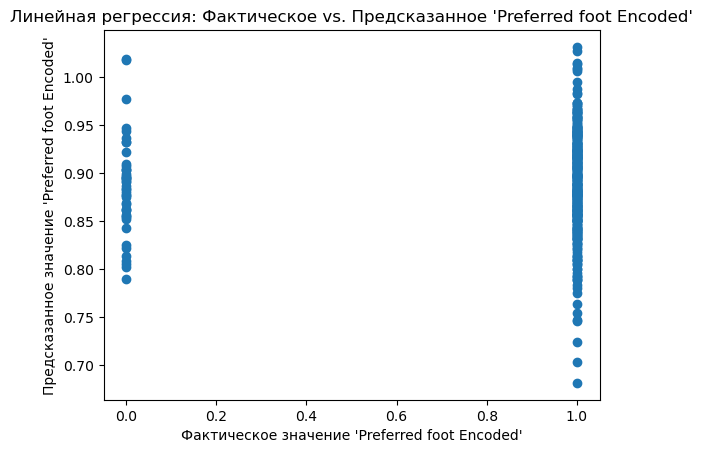

In [122]:

# Оценка линейной регрессии
linear_predictions = linear_grid.predict(X_test)
mae = mean_absolute_error(y_test, linear_predictions)
mse = mean_squared_error(y_test, linear_predictions)
r2 = r2_score(y_test, linear_predictions)

print("MAE: ", mae)
print("MSE: ", mse)
print("R^2: ", r2)


plt.scatter(y_test, linear_predictions)
plt.xlabel("Фактическое значение 'Preferred foot Encoded'")
plt.ylabel("Предсказанное значение 'Preferred foot Encoded'")
plt.title("Линейная регрессия: Фактическое vs. Предсказанное 'Preferred foot Encoded'")
plt.show()



Лучшие параметры для логистической регрессии: {'C': 1, 'penalty': 'l2'}
Отчет о классификации для логистической регрессии:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        46
           1       0.88      1.00      0.94       345

    accuracy                           0.88       391
   macro avg       0.94      0.50      0.47       391
weighted avg       0.90      0.88      0.83       391



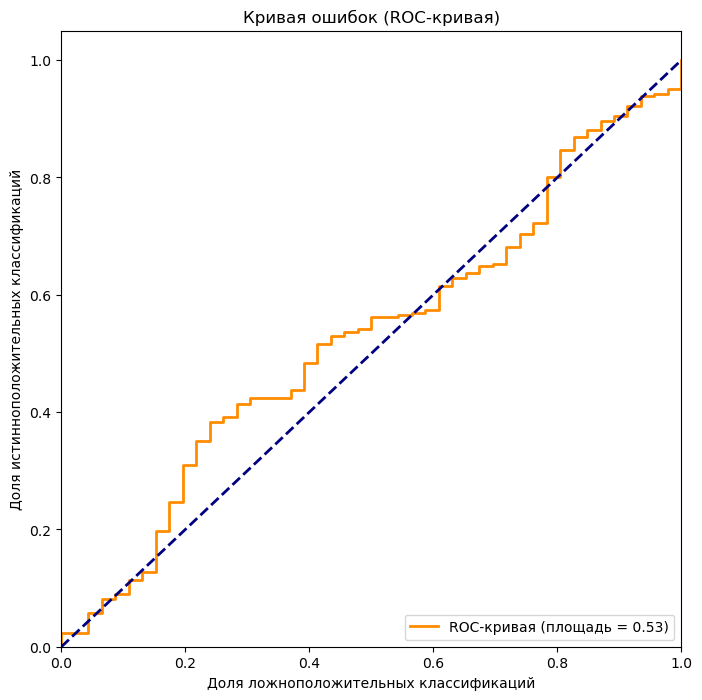

In [127]:
# Классификация с использованием логистической регрессии
logistic_model = LogisticRegression(solver='liblinear', max_iter=1000)  # увеличиваем max_iter
logistic_params = {'C': [0.001, 0.01, 0.1, 1, 10,], 'penalty': ['l1', 'l2']}
logistic_grid = GridSearchCV(logistic_model, logistic_params, cv=5)
logistic_grid.fit(X_train, y_train)

# Вывод результатов для логистической регрессии
print("Лучшие параметры для логистической регрессии:", logistic_grid.best_params_)

# Создание новой модели с лучшими параметрами
best_logistic_model = LogisticRegression(
    solver='liblinear',
    max_iter=1000,
    C=logistic_grid.best_params_['C'],
    penalty=logistic_grid.best_params_['penalty']
)

# Обучение модели с лучшими параметрами
best_logistic_model.fit(X_train, y_train)

# Оценка логистической регрессии
logistic_predictions = best_logistic_model.predict(X_test)
logistic_classification_report = classification_report(y_test, logistic_predictions, zero_division=1)
print("Отчет о классификации для логистической регрессии:\n", logistic_classification_report)

# Получение вероятностей положительного класса для расчета ROC-кривой
logistic_probabilities = best_logistic_model.predict_proba(X_test)[:, 1]

# Рассчитываем значения ROC-кривой
fpr, tpr, _ = roc_curve(y_test, logistic_probabilities)
roc_auc = auc(fpr, tpr)

# Строим ROC-кривую
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (площадь = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций')
plt.title('Кривая ошибок (ROC-кривая)')
plt.legend(loc='lower right')
plt.show()